In [1]:
#Importing neccessary libraries and packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Loading previously scraped data into Pandas DataFrame

players = pd.read_csv("players.csv")
players

,name,rating,value
0,Neymar Jr,92,€105.5M
1,L. Messi,94,€95.5M
2,K. Mbappé,89,€93.5M
3,V. van Dijk,91,€90M
4,K. De Bruyne,91,€90M
...,...,...,...
19692,I. Isa,63,€0
19693,I. Fetfatzidis,74,€0
19694,M. Mohsen,66,€0
19695,B. Jokič,72,€0


In [3]:
#Data Cleaning

players.columns = ["Name", "Overall Rating", "Value"]
players

,Name,Overall Rating,Value
0,Neymar Jr,92,€105.5M
1,L. Messi,94,€95.5M
2,K. Mbappé,89,€93.5M
3,V. van Dijk,91,€90M
4,K. De Bruyne,91,€90M
...,...,...,...
19692,I. Isa,63,€0
19693,I. Fetfatzidis,74,€0
19694,M. Mohsen,66,€0
19695,B. Jokič,72,€0


In [4]:
len(players)

19697

In [5]:
#Check for and remove duplicates

players = players.drop_duplicates()

In [6]:
len(players)

19632

In [7]:
players[60:61]

,Name,Overall Rating,Value
60,name,rating,value


In [8]:
players = players.drop(players.index[60])

In [9]:
len(players)

19631

In [10]:
#Checking data types in our Dataframe

players.dtypes

Name              object
Overall Rating    object
Value             object
dtype: object

Objects are equivalent to strings in pandas, so we need to convert the numbers into numeric values in order to operate on them.

In [11]:
#A function to convert the values in the third row from strings to floats. This is going to be the target variable.
    
def value_to_float(value_as_string): # eg.'€95.5M'
    
    value_as_string = value_as_string.strip('€')   
    value_as_float = 0
    
    if 'M' in value_as_string:                       #95.5M - string
        value_as_string = value_as_string.strip('M') #95.5 - string
        multiplier = float(value_as_string)          #95.5 - float
        value_as_float = multiplier * 1000000        #95000000.0 - float
        
    if 'K' in value_as_string:
        value_as_string = value_as_string.strip('K') 
        multiplier = float(value_as_string)
        value_as_float = multiplier * 1000           #Same as above, in case of K(Thousands)
        
    return value_as_float

In [12]:
players["Value"] = players["Value"].apply(value_to_float)
players

,Name,Overall Rating,Value
0,Neymar Jr,92,105500000.0
1,L. Messi,94,95500000.0
2,K. Mbappé,89,93500000.0
3,V. van Dijk,91,90000000.0
4,K. De Bruyne,91,90000000.0
...,...,...,...
19692,I. Isa,63,0.0
19693,I. Fetfatzidis,74,0.0
19694,M. Mohsen,66,0.0
19695,B. Jokič,72,0.0


In [13]:
#Scaling Values to represent values in millions for better readability

players["Value"] = players["Value"].apply(lambda x: x / 1000000)
players["Value"]

0        105.5
1         95.5
2         93.5
3         90.0
4         90.0
         ...  
19692      0.0
19693      0.0
19694      0.0
19695      0.0
19696      0.0
Name: Value, Length: 19631, dtype: float64

In [14]:
#Updating the name of the column to reflect the changes

players = players.rename({'Value': 'Value in Millions'}, axis='columns')
players

,Name,Overall Rating,Value in Millions
0,Neymar Jr,92,105.5
1,L. Messi,94,95.5
2,K. Mbappé,89,93.5
3,V. van Dijk,91,90.0
4,K. De Bruyne,91,90.0
...,...,...,...
19692,I. Isa,63,0.0
19693,I. Fetfatzidis,74,0.0
19694,M. Mohsen,66,0.0
19695,B. Jokič,72,0.0


In [15]:
#Building the base model

X = players["Overall Rating"].values.reshape(-1, 1)
Y = players["Value in Millions"]

In [16]:
X.shape, Y.shape

((19631, 1), (19631,))

In [17]:
#Separating the data into 80% traininig set and 20% test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 )

In [18]:
X_train.shape, Y_train.shape

((15704, 1), (15704,))

In [19]:
X_test.shape, Y_test.shape

((3927, 1), (3927,))

In [20]:
model = linear_model.LinearRegression()

In [21]:
#Training the model

model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#Running the prediction

Y_pred = model.predict(X_test)

In [23]:
#Evaluating base model

print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [0.50609063]
Intercept: -31.05047809482031
Mean squared error (MSE): 19.75
Coefficient of determination (R^2): 0.39


In [24]:
#Displaying relevant metrics inside of a DataFrame

metrics = {'Coefficient': model.coef_, 'Intercept': [model.intercept_], 'MSE': mean_squared_error(Y_test, Y_pred), 'R^2': r2_score(Y_test, Y_pred)}
base_model_metrics = pd.DataFrame(data = metrics)
base_model_metrics

,Coefficient,Intercept,MSE,R^2
0,0.506091,-31.050478,19.752984,0.385986


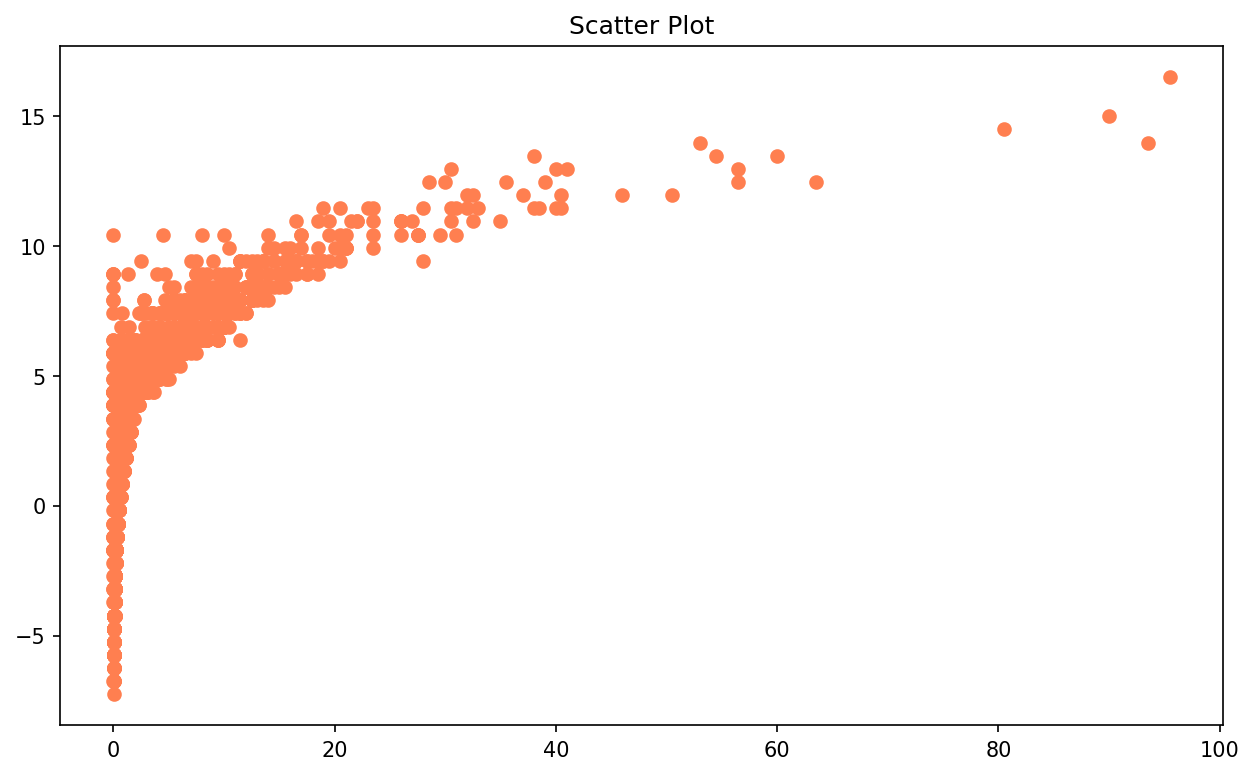

In [25]:
# Visualization through Scatter Plot and Regression Line

plt.figure(figsize=(10,6),dpi=150),
base_model_scatter_plot = plt.scatter(Y_test, Y_pred, color="coral")
plt.title("Scatter Plot")
plt.show()

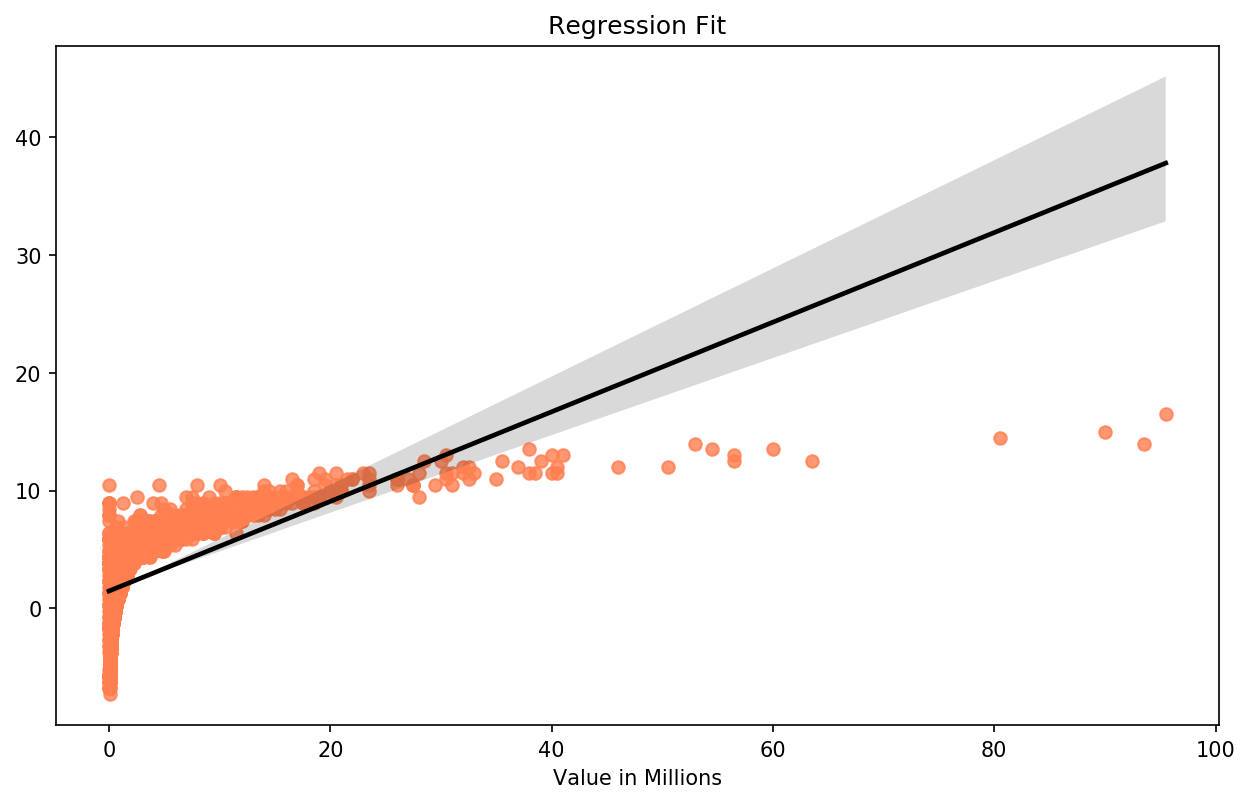

In [26]:
plt.figure(figsize=(10,6),dpi=150),
base_model_regplot = sns.regplot(Y_test, Y_pred, scatter_kws={"color": "coral"}, line_kws={"color": "black"})
plt.title("Regression Fit")
plt.show()

The regression fit is looking asymmetrical, so let's check the skewness of our target variable.

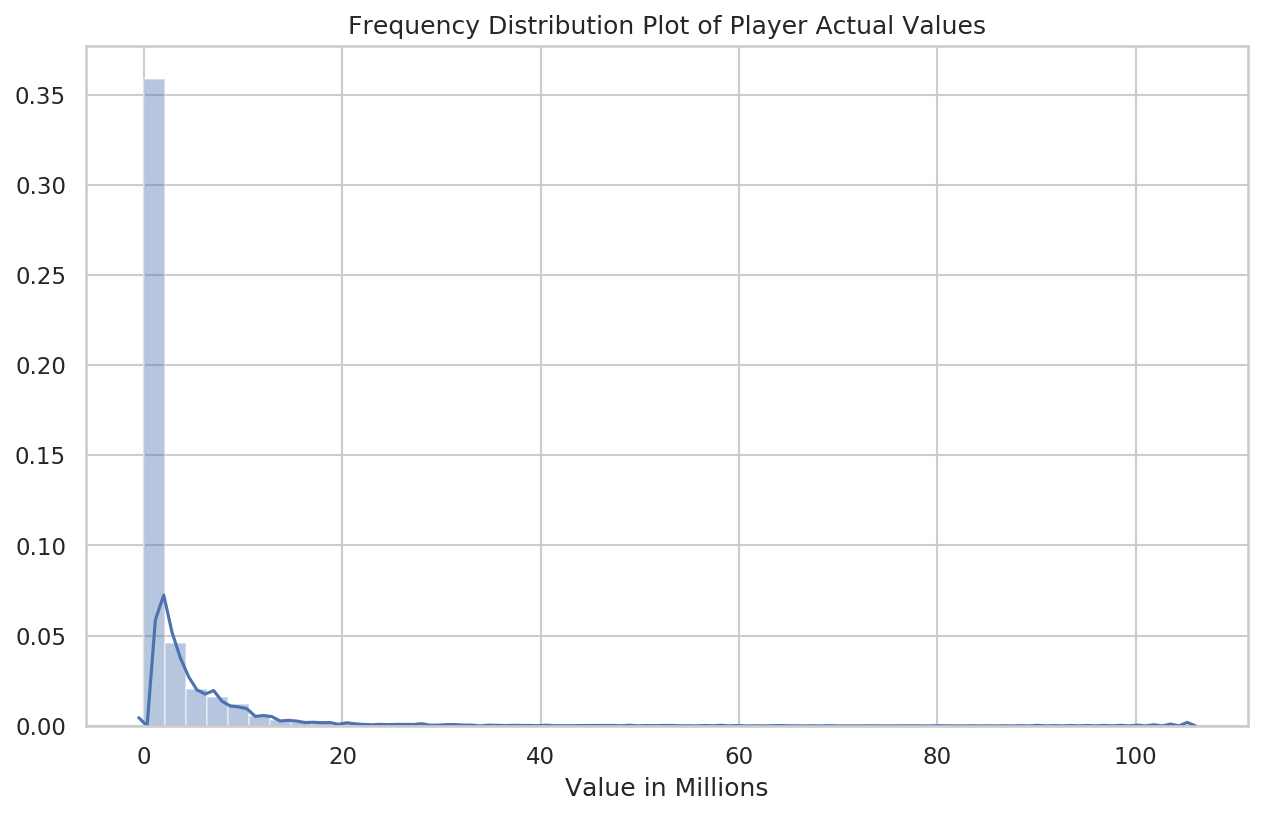

In [27]:
#Visualizing distribution of the target variable

x = players["Value in Millions"]
sns.set(style="whitegrid")
plt.figure(figsize=(10,6),dpi=150),
sns.distplot(x).set_title('Frequency Distribution Plot of Player Actual Values')
plt.show()

In [28]:
players["Value in Millions"].skew()

6.725109883149608

It's heavily positively skewed, so we need to use log transformation to try and reduce skewness.

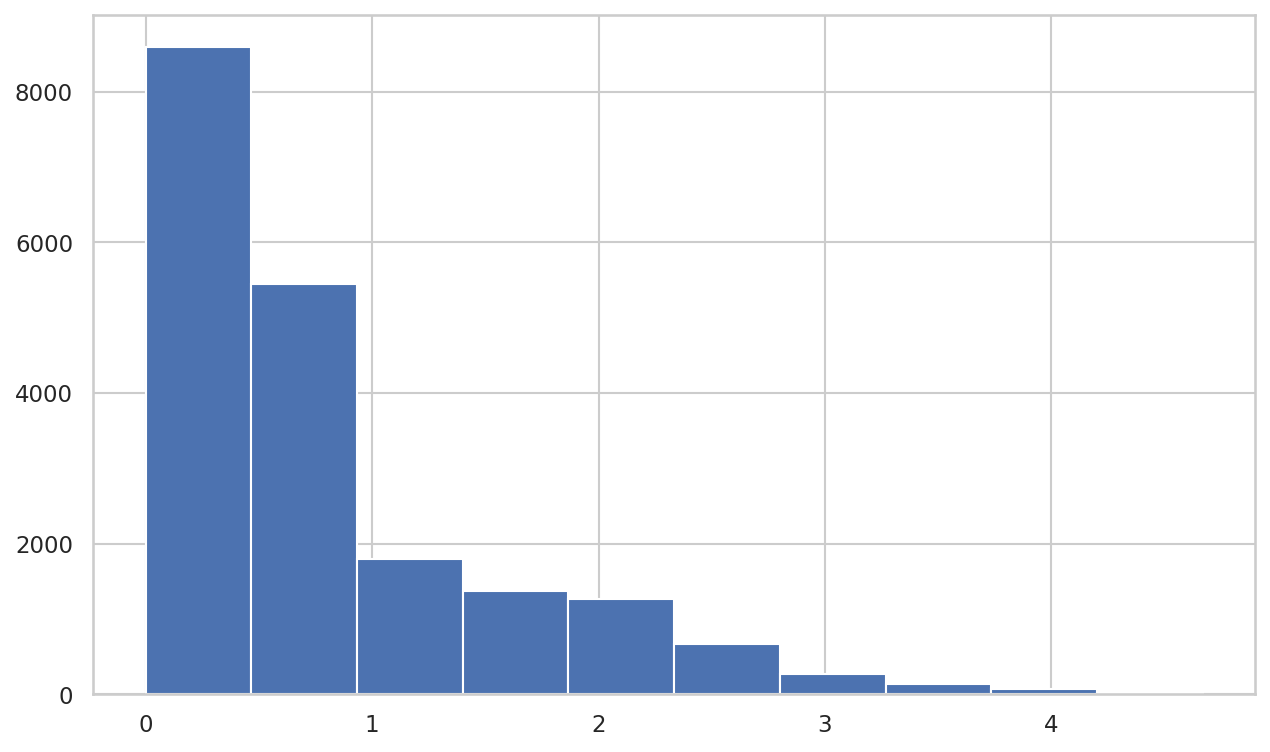

In [29]:
#Log+1 Transformation and checking skewness again

plt.figure(figsize=(10,6),dpi=150),
log_Y = np.log1p(Y) #We pass the parameter Y because we already defined Y = players["Value in Millions"] as target variable in the above code(line 17)
log_Y.hist()

In [30]:
log_Y.skew()

1.5508236980071635

In [31]:
#Assigning log transformed Value variable with reduced skewness to a new column in the dataframe 

players["Log_Y Value"] = log_Y
players

,Name,Overall Rating,Value in Millions,Log_Y Value
0,Neymar Jr,92,105.5,4.668145
1,L. Messi,94,95.5,4.569543
2,K. Mbappé,89,93.5,4.548600
3,V. van Dijk,91,90.0,4.510860
4,K. De Bruyne,91,90.0,4.510860
...,...,...,...,...
19692,I. Isa,63,0.0,0.000000
19693,I. Fetfatzidis,74,0.0,0.000000
19694,M. Mohsen,66,0.0,0.000000
19695,B. Jokič,72,0.0,0.000000


In [32]:
#Building a model using the new Value variable with reduced skewness

X = players["Overall Rating"].values.reshape(-1, 1)
Y = players["Log_Y Value"] #This is the only thing we change
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2 )
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
Y_pred = model.predict(X_test)

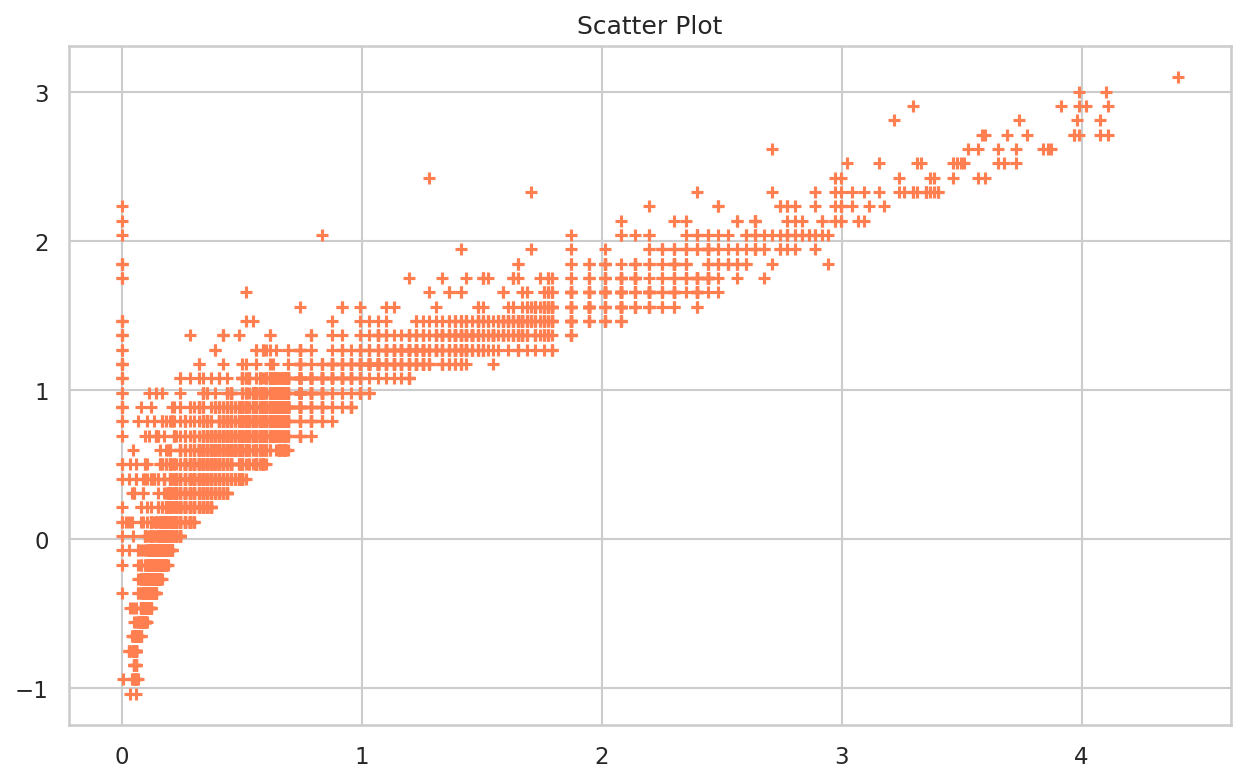

In [34]:
plt.figure(figsize=(10,6),dpi=150),
adjusted_model_scatter_plot = plt.scatter(Y_test, Y_pred, marker = "+", color="coral")
plt.title("Scatter Plot")
plt.show()

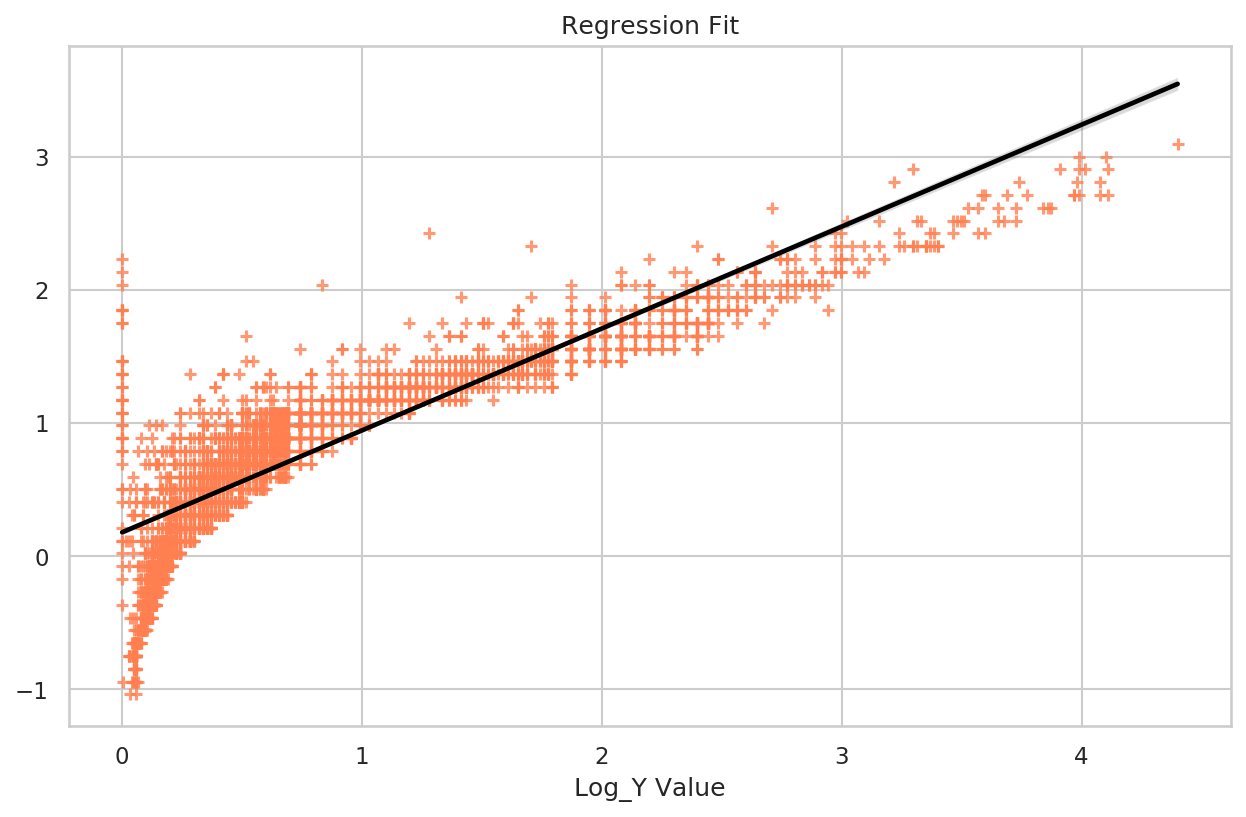

In [35]:
plt.figure(figsize=(10,6),dpi=150),
adjusted_model_regplot = sns.regplot(Y_test, Y_pred, marker = "+", scatter_kws={"color": "coral"}, line_kws={"color": "black"})
plt.title("Regression Fit")
plt.show()

In [36]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [0.09623831]
Intercept: -5.5600158081301245
Mean squared error (MSE): 0.14
Coefficient of determination (R^2): 0.76


In [37]:
metrics = {'Coefficient': model.coef_, 'Intercept': [model.intercept_], 'MSE': mean_squared_error(Y_test, Y_pred), 'R^2': r2_score(Y_test, Y_pred)}
adjusted_model_metrics = pd.DataFrame(data = metrics)
adjusted_model_metrics

,Coefficient,Intercept,MSE,R^2
0,0.096238,-5.560016,0.13807,0.760528


In [38]:
#Comparing two models

compared_models = pd.concat([base_model_metrics, adjusted_model_metrics])
compared_models = compared_models.reset_index()
compared_models = compared_models.rename({0: 'Base Model', 1: 'Adjusted Model'})
compared_models = compared_models.drop(['index'], axis=1)
compared_models

,Coefficient,Intercept,MSE,R^2
Base Model,0.506091,-31.050478,19.752984,0.385986
Adjusted Model,0.096238,-5.560016,0.138070,0.760528


Comparing metrics between the two models clearly shows the effects of transformation - the error is greatly reduced in the adjusted version, while coefficient of determination rose to a pretty decent level. The coefficient has been adjusted as well.

In [39]:
Y_predict = model.predict(X)
players["Model Prediction"] = np.expm1(Y_predict)
players

,Name,Overall Rating,Value in Millions,Log_Y Value,Model Prediction
0,Neymar Jr,92,105.5,4.668145,25.947999
1,L. Messi,94,95.5,4.569543,31.667663
2,K. Mbappé,89,93.5,4.548600,19.190135
3,V. van Dijk,91,90.0,4.510860,23.475454
4,K. De Bruyne,91,90.0,4.510860,23.475454
...,...,...,...,...,...
19692,I. Isa,63,0.0,0.000000,0.653671
19693,I. Fetfatzidis,74,0.0,0.000000,3.766534
19694,M. Mohsen,66,0.0,0.000000,1.207174
19695,B. Jokič,72,0.0,0.000000,2.931979


In [40]:
players[3000:3010]

,Name,Overall Rating,Value in Millions,Log_Y Value,Model Prediction
3061,Raffael,76,4.1,1.629241,4.778222
3062,R. Henry,72,4.1,1.629241,2.931979
3063,Lekue,73,4.1,1.629241,3.329193
3064,N. Orsini,72,4.1,1.629241,2.931979
3065,F. Tănase,72,4.1,1.629241,2.931979
3066,M. Benítez,73,4.0,1.609438,3.329193
3067,Léo Bonatini,72,4.0,1.609438,2.931979
3068,R. Andrich,72,4.0,1.609438,2.931979
3069,Marcelo Grohe,75,4.0,1.609438,4.248056
3070,M. Frey,72,4.0,1.609438,2.931979


In [41]:
players[7000:7010]

,Name,Overall Rating,Value in Millions,Log_Y Value,Model Prediction
7061,Manu Hernando,66,1.1,0.741937,1.207174
7062,M. Bareiro,68,1.1,0.741937,1.675642
7063,R. Söder,69,1.1,0.741937,1.945940
7064,L. Lollo,70,1.1,0.741937,2.243543
7065,H. Duljević,68,1.1,0.741937,1.675642
7066,J. Edmundsson,69,1.1,0.741937,1.945940
7067,M. Pennington,68,1.1,0.741937,1.675642
7068,F. Lewis,69,1.1,0.741937,1.945940
7069,Jung Seok Hwa,69,1.1,0.741937,1.945940
7070,Alain Oyarzun,68,1.1,0.741937,1.675642


In [42]:
players[15000:15010]

,Name,Overall Rating,Value in Millions,Log_Y Value,Model Prediction
15063,L. Broź,66,0.3,0.262364,1.207174
15064,K. Takahata,59,0.3,0.262364,0.125294
15065,E. Guerrero,62,0.3,0.262364,0.501943
15066,S. McDonald,66,0.3,0.262364,1.207174
15067,S. Neville,63,0.3,0.262364,0.653671
15068,K. Sheppard,61,0.3,0.262364,0.364136
15069,N. Jüllich,62,0.3,0.262364,0.501943
15070,Im Dong Hyuk,61,0.3,0.262364,0.364136
15071,B. Stephens,60,0.3,0.262364,0.238973
15072,M. Nuhu,60,0.3,0.262364,0.238973


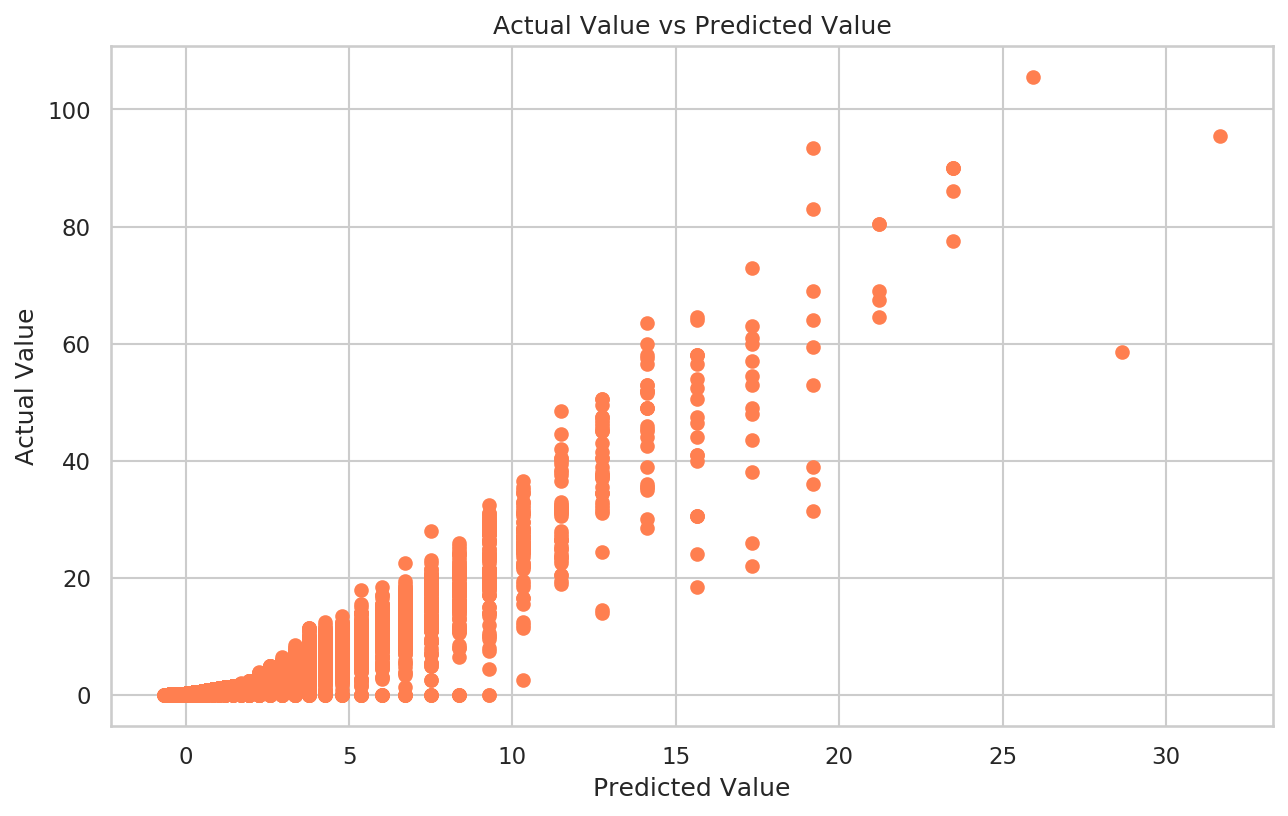

In [43]:
# Regression Fit 

plt.figure(figsize=(10,6),dpi=150),

plt.scatter(players["Model Prediction"], players["Value in Millions"],c="coral")
plt.title("Actual Value vs Predicted Value")
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.show()

We can conclude that variable X (Overall Player Rating) is definitely positively correlated with variable Y (Player Market Value). However, explanatory power of this single variable is rather limited and completely unbased in the cases of outliers - extremely expensive players. In order to create a better performing model in terms of predicting Y, we would need to include additional predictor variables. This would improve the model in two main ways: 

1. Naturally increasing the proportion of variance explained as a simple consequence of additional information
2. Limiting the impact that X variable currently holds as the only source of prediction